In [10]:
# Standard Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing SciPy stats
from scipy import stats

In [11]:
# Importing data into pandas dataframe
df = pd.read_csv(r'Data\data.csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


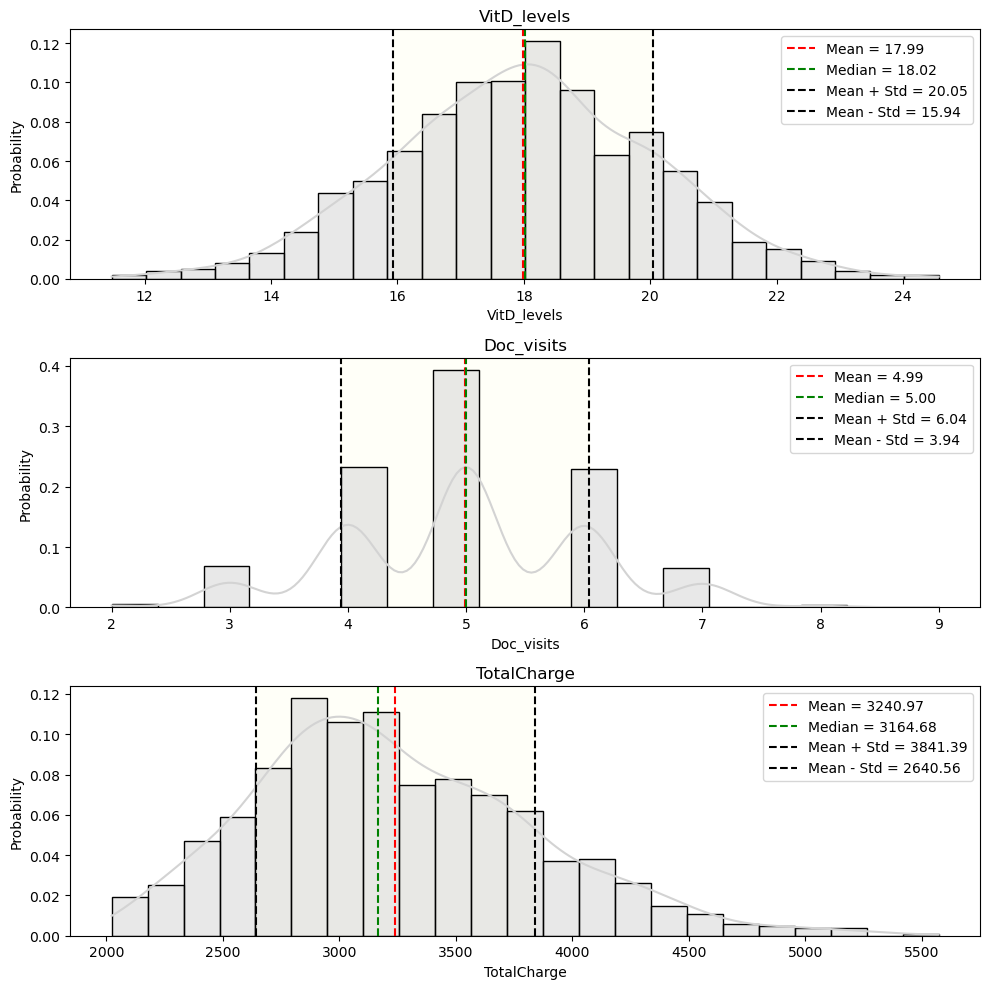

In [12]:
# Creating a new dataframe to loop through certain columns
med_df = df[['VitD_levels', 'Doc_visits', 'TotalCharge']]

# Creating figure and axes for subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
# Using enumerate to loop through the columns and axes
for i, col in enumerate(med_df.columns):
    feature = med_df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    zscore = (feature - mean) / std
    plus_std = mean + std
    minus_std = mean - std
    sns.histplot(feature, kde=True, stat='probability', ax=ax[i], color='lightgray')
    ax[i].axvline(feature.mean(), color='red', linestyle='--', label='Mean = {:.2f}'.format(mean))
    ax[i].axvline(feature.median(), color='green', linestyle='--', label='Median = {:.2f}'.format(median))
    ax[i].axvline(plus_std, color='black', linestyle='--', label='Mean + Std = {:.2f}'.format(plus_std))
    ax[i].axvline(minus_std, color='black', linestyle='--', label='Mean - Std = {:.2f}'.format(minus_std))
    ax[i].axvspan(plus_std, minus_std, alpha=0.2, color='lightyellow', zorder=0)
    ax[i].set_title(col)
    ax[i].set_ylabel('Probability')
    ax[i].legend()
plt.tight_layout()
plt.show()

# 1. Is it Discrete or Continuous?

### VitD_levels

Since the bars in the histogram does not apear to contain gaps in between each bar. This would be a telltale that this is a continuous distrobution

### Doc_visits

Since the bars in the Doc_visits graph above appear to contain gaps in between each bar. This would indicate that this column contains a discrete distrobution.

### TotalCharge

Since this graph contains bars without any gaps in between each bar, this is clearly a continous distrobution.

# 2. Does it have a skew? If so, which direction (+/-)

### VitD_levels

There is no skew for this visualization. 

### Doc_visits

There is no skew for this visualization.

### TotalCharge

Total charge is skewed in a positive direction. The reason being since the median is smaller than the mean, the values in the columns shift is a positive direction.

# 3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)?

In [29]:
# Using SciPy kurtosis function to calculate the kurtosis of the columns specified
kurt_total = stats.kurtosis(df['TotalCharge'], fisher=False)
kurt_doc = stats.kurtosis(med_df['Doc_visits'], fisher=False)
kurt_vitd = stats.kurtosis(med_df['VitD_levels'], fisher=False)
# Creating a list of the Kurtosis values 
kurt_list = [kurt_vitd, kurt_doc, kurt_total]
# Creating a loop to print the kurtosis values and the type of ditribution for each column in the dataframe
for i, col in enumerate(med_df.columns):
    print('Kurtosis for {} = {:.2f}'.format(col, kurt_list[i]))


Kurtosis for VitD_levels = 3.01
Kurtosis for Doc_visits = 2.99
Kurtosis for TotalCharge = 3.27


### VitD_levels
This column seems to have a kurtosis of 3.01. Judging by the visualization above that this graph is Mesokurtic since most a the clustered values are in the middle of the distrobution.

### Doc_visits 
This columns is strange in the dips that happens inbetween each value. Even though there gaps inbetween our values because of the kurtosis values equating to 2.99 (3). This visualization will result in being Mesokurtic.

### Total Charge
This column because it is greater than 3 and which results in a more pointy distrobution. This graph would most likely be Leptokurtic.